In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

C:\Users\zishi.zhong\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')

In [3]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Observations
- Age, Embarked and Cabin have some missing values
- Age's format is float

In [5]:
#drop PassengerId and Ticket since they are less useful for prediction
trainSet = trainSet.drop(["PassengerId","Ticket"],axis=1)

In [6]:
collections.Counter(trainSet["Pclass"])

Counter({1: 216, 2: 184, 3: 491})

In [7]:
cls_df = trainSet[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
cls_df

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


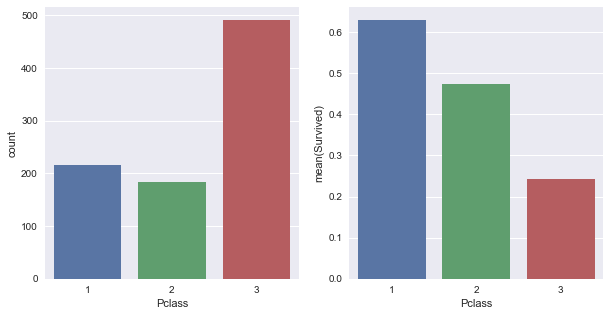

In [8]:
plt.figure(1,(10,5))
plt.subplot(121)
sns.countplot(x="Pclass",data=trainSet)
plt.subplot(122)
sns.barplot(x="Pclass",y="Survived",data=cls_df)

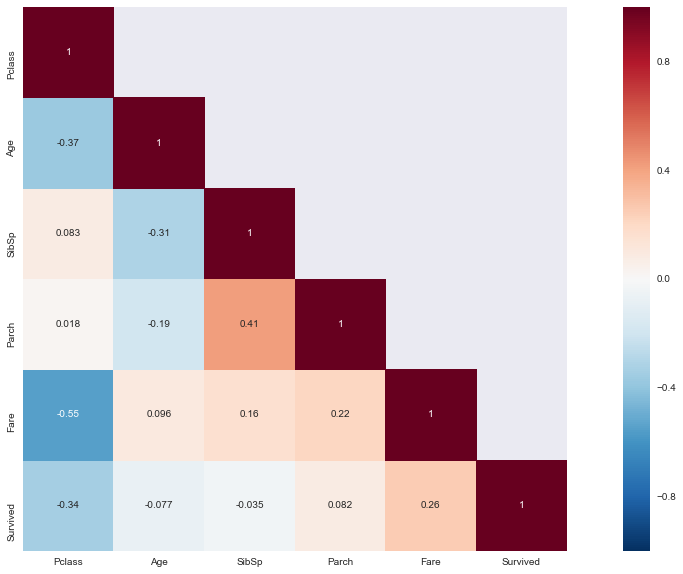

In [9]:
df1 = trainSet.drop(['Survived'],axis=1)
df1['Survived']=trainSet['Survived']
df1 = df1.corr()
mask = np.array(df1)
mask[np.tril_indices_from(mask)]=False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data=df1,mask=mask,annot=True,square=True)

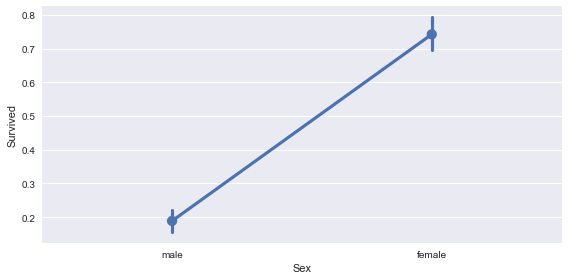

In [10]:
sns.factorplot(x='Sex',y='Survived',data=trainSet,size=4,aspect=2)

In [11]:
trainSet['Sex'] = (trainSet['Sex'] == 'male').astype(int)

In [12]:
trainSet['Sex'].describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [13]:
trainSet['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\zishi.zhong\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zishi.zhong\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\zishi.zhong\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_

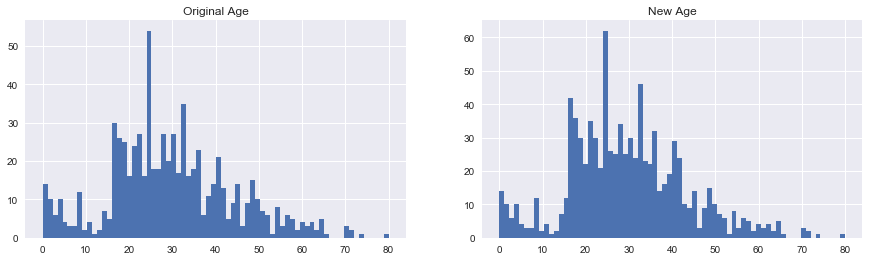

In [14]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age')
axis2.set_title('New Age')

age_std = trainSet['Age'].std()
age_mean = trainSet['Age'].mean()
size = trainSet['Age'].isnull().sum()
age = trainSet[['Age','Survived']]
age['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

fillvalues=np.random.randint(age_mean-age_std,age_mean+age_std,size=size)
age['Age'][np.isnan(age['Age'])] = fillvalues
age['Age'] = age['Age'].astype(int)
age['Age'].hist(bins=70,ax=axis2)


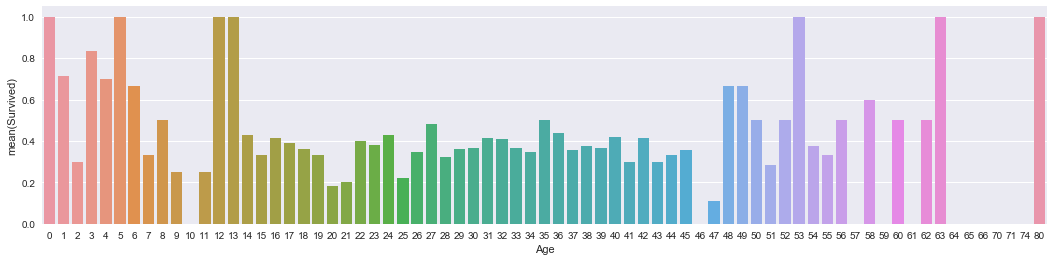

In [15]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = age.groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

In [16]:
trainSet['Age'] = age['Age']
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(1), int32(2), int64(4), object(3)
memory usage: 62.7+ KB


In [21]:
cabin = trainSet[['Cabin','Survived']]
collections.Counter(cabin['Cabin'].dropna())

Counter({'A10': 1,
         'A14': 1,
         'A16': 1,
         'A19': 1,
         'A20': 1,
         'A23': 1,
         'A24': 1,
         'A26': 1,
         'A31': 1,
         'A32': 1,
         'A34': 1,
         'A36': 1,
         'A5': 1,
         'A6': 1,
         'A7': 1,
         'B101': 1,
         'B102': 1,
         'B18': 2,
         'B19': 1,
         'B20': 2,
         'B22': 2,
         'B28': 2,
         'B3': 1,
         'B30': 1,
         'B35': 2,
         'B37': 1,
         'B38': 1,
         'B39': 1,
         'B4': 1,
         'B41': 1,
         'B42': 1,
         'B49': 2,
         'B5': 2,
         'B50': 1,
         'B51 B53 B55': 2,
         'B57 B59 B63 B66': 2,
         'B58 B60': 2,
         'B69': 1,
         'B71': 1,
         'B73': 1,
         'B77': 2,
         'B78': 1,
         'B79': 1,
         'B80': 1,
         'B82 B84': 1,
         'B86': 1,
         'B94': 1,
         'B96 B98': 4,
         'C101': 1,
         'C103': 1,
         'C104': 1,


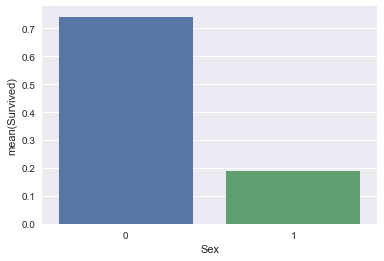

In [28]:
sex = trainSet[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
#sns.violinplot(x=sex['Sex'],y=sex['Survived'],data=sex )
sns.barplot(x=sex['Sex'],y=sex['Survived'],data=sex)

In [30]:
def child(person):
    age,sex = person
    return 3 if age<16 else sex

trainSet['person'] = trainSet[['Age','Sex']].apply(child,axis=1)

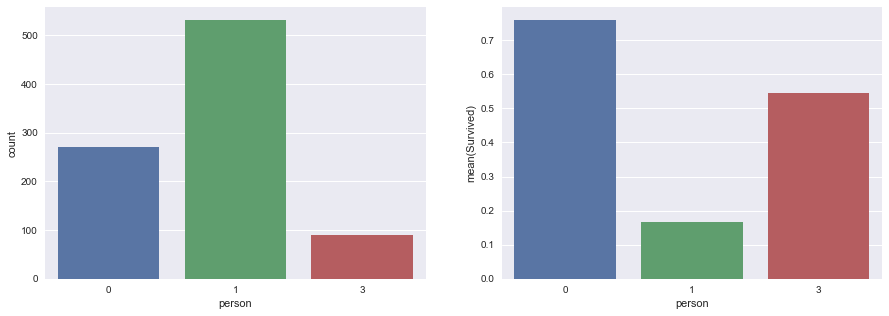

In [39]:
sex = trainSet[['person','Survived']].groupby(['person'],as_index=False).mean()
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=sex['person'],y=sex['Survived'],data=sex,ax=axis2)
sns.countplot(x=trainSet['person'],ax=axis1)